In [ ]:
import requests
import pandas as pd

years = range(2015, 2025)

# Data containers
drivers_data = []
circuits_data = []
constructors_data = []
laps_data = []
status_data = []
qualifying_data = []
driver_standings = []
constructor_standings = []
race_schedule_data = []
race_results = []
pitstop_data = []

for year in years:
    print(f"\n📦 Fetching data for {year}...")

    # === Drivers ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/drivers?format=json")
        if r.ok:
            for d in r.json()["MRData"]["DriverTable"]["Drivers"]:
                d["Year"] = year
                drivers_data.append(d)
    except:
        print(f"❌ Drivers failed for {year}")

    # === Circuits ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/circuits?format=json")
        if r.ok:
            for c in r.json()["MRData"]["CircuitTable"]["Circuits"]:
                c["Year"] = year
                loc = c.get("Location", {})
                c["Latitude"] = loc.get("lat")
                c["Longitude"] = loc.get("long")
                c["Locality"] = loc.get("locality")
                c["Country"] = loc.get("country")
                circuits_data.append(c)
    except:
        print(f"❌ Circuits failed for {year}")

    # === Constructors ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/constructors?format=json")
        if r.ok:
            for c in r.json()["MRData"]["ConstructorTable"]["Constructors"]:
                c["Year"] = year
                constructors_data.append(c)
    except:
        print(f"❌ Constructors failed for {year}")

    # === Laps (Race 1) ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/1/laps?format=json")
        if r.ok:
            for race in r.json()["MRData"]["RaceTable"]["Races"]:
                for lap in race.get("Laps", []):
                    lap["Year"] = year
                    lap["Race_Name"] = race.get("raceName")
                    lap["Date"] = race.get("date")
                    loc = race.get("Circuit", {}).get("Location", {})
                    lap["Latitude"] = loc.get("lat")
                    lap["Longitude"] = loc.get("long")
                    lap["Locality"] = loc.get("locality")
                    lap["Country"] = loc.get("country")
                    laps_data.append(lap)
    except:
        print(f"❌ Laps failed for {year}")

    # === Qualifying ===
    try:
        r = requests.get(f"https://ergast.com/api/f1/{year}/qualifying.json")
        if r.ok:
            for race in r.json()["MRData"]["RaceTable"]["Races"]:
                for q in race.get("QualifyingResults", []):
                    qualifying_data.append({
                        "Season": year,
                        "Round": race.get("round"),
                        "Race": race.get("raceName"),
                        "Circuit": race.get("Circuit", {}).get("circuitName"),
                        "Driver": q["Driver"].get("familyName"),
                        "Constructor": q["Constructor"].get("name"),
                        "Position": q.get("position"),
                        "Q1": q.get("Q1", "N/A"),
                        "Q2": q.get("Q2", "N/A"),
                        "Q3": q.get("Q3", "N/A")
                    })
    except:
        print(f"❌ Qualifying failed for {year}")

    # === Driver Standings ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/driverstandings/")
        if r.ok:
            standings = r.json()["MRData"]["StandingsTable"].get("StandingsLists", [])
            if standings:
                for s in standings[0]["DriverStandings"]:
                    driver_standings.append({
                        "Season": year,
                        "Position": s["position"],
                        "Points": s["points"],
                        "Wins": s["wins"],
                        "Driver": f"{s['Driver']['givenName']} {s['Driver']['familyName']}",
                        "Nationality": s["Driver"]["nationality"],
                        "Constructor": s["Constructors"][0]["name"]
                    })
    except:
        print(f"❌ Driver standings failed for {year}")

    # === Constructor Standings ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/constructorstandings/")
        if r.ok:
            standings = r.json()["MRData"]["StandingsTable"].get("StandingsLists", [])
            if standings:
                for s in standings[0]["ConstructorStandings"]:
                    constructor_standings.append({
                        "Season": year,
                        "Position": s["position"],
                        "Points": s["points"],
                        "Wins": s["wins"],
                        "Constructor": s["Constructor"]["name"],
                        "Nationality": s["Constructor"]["nationality"]
                    })
    except:
        print(f"❌ Constructor standings failed for {year}")

    # === Race Schedule ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/races/")
        if r.ok:
            for race in r.json()["MRData"]["RaceTable"]["Races"]:
                race_schedule_data.append({
                    "Season": year,
                    "Round": race["round"],
                    "Race Name": race["raceName"],
                    "Date": race["date"],
                    "Time (UTC)": race.get("time", "N/A"),
                    "Circuit": race["Circuit"]["circuitName"],
                    "Locality": race["Circuit"]["Location"]["locality"],
                    "Country": race["Circuit"]["Location"]["country"]
                })
    except:
        print(f"❌ Race schedule failed for {year}")

    # === Race Results ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}/results/")
        if r.ok:
            for race in r.json()["MRData"]["RaceTable"]["Races"]:
                for result in race.get("Results", []):
                    race_results.append({
                        "Season": year,
                        "Round": race["round"],
                        "Race": race["raceName"],
                        "Date": race["date"],
                        "Circuit": race["Circuit"]["circuitName"],
                        "Locality": race["Circuit"]["Location"]["locality"],
                        "Country": race["Circuit"]["Location"]["country"],
                        "Driver": f"{result['Driver']['givenName']} {result['Driver']['familyName']}",
                        "Constructor": result["Constructor"]["name"],
                        "Grid": result.get("grid", "N/A"),
                        "Position": result.get("position", "N/A"),
                        "Points": result.get("points", "N/A"),
                        "Status": result.get("status", "N/A"),
                        "Time": result.get("Time", {}).get("time", "N/A"),
                        "Fastest Lap Rank": result.get("FastestLap", {}).get("rank", "N/A"),
                        "Fastest Lap Time": result.get("FastestLap", {}).get("Time", {}).get("time", "N/A")
                    })
    except:
        print(f"❌ Race results failed for {year}")

    # === Pit Stops ===
    try:
        r = requests.get(f"https://api.jolpi.ca/ergast/f1/{year}.json")
        if r.ok:
            races = r.json()["MRData"]["RaceTable"]["Races"]
            for race in races:
                round_number = race["round"]
                race_name = race["raceName"]
                circuit = race["Circuit"]["circuitName"]
                country = race["Circuit"]["Location"]["country"]
                date = race["date"]

                pitstop_url = f"https://api.jolpi.ca/ergast/f1/{year}/{round_number}/pitstops.json"
                pit_response = requests.get(pitstop_url)

                if pit_response.status_code == 200:
                    stops = pit_response.json()["MRData"]["RaceTable"]["Races"]
                    if stops:
                        pitstops = stops[0].get("PitStops", [])
                        for stop in pitstops:
                            pitstop_data.append({
                                "Season": year,
                                "Round": round_number,
                                "Race": race_name,
                                "Date": date,
                                "Circuit": circuit,
                                "Country": country,
                                "DriverId": stop["driverId"],
                                "Lap": stop["lap"],
                                "Stop Number": stop["stop"],
                                "Time of Day": stop["time"],
                                "Duration": stop["duration"]
                            })
    except:
        print(f"❌ Pit stops failed for {year}")

# === Status (once) ===
try:
    r = requests.get(f"https://api.jolpi.ca/ergast/f1/status/{year}.json")
    if r.ok:
        status_data = r.json()["MRData"]["StatusTable"]["Status"]
except:
    print("❌ Status list failed")

# === Save to CSV ===
print("\n💾 Saving all datasets to CSV...")

pd.DataFrame(drivers_data).to_csv("f1_drivers_2015_2024.csv", index=False)
pd.DataFrame(circuits_data).to_csv("f1_circuits_2015_2024.csv", index=False)
pd.DataFrame(constructors_data).to_csv("f1_constructors_2015_2024.csv", index=False)
pd.DataFrame(laps_data).to_csv("f1_laps_2015_2024.csv", index=False)
pd.DataFrame(status_data).to_csv("f1_status_list.csv", index=False)
pd.DataFrame(qualifying_data).to_csv("f1_qualifying_results_2015_2024.csv", index=False)
pd.DataFrame(driver_standings).to_csv("f1_driver_standings_2015_2024.csv", index=False)
pd.DataFrame(constructor_standings).to_csv("f1_constructor_standings_2015_2024.csv", index=False)
pd.DataFrame(race_schedule_data).to_csv("f1_races_2015_2024.csv", index=False)
pd.DataFrame(race_results).to_csv("f1_race_results_2015_2024.csv", index=False)
pd.DataFrame(pitstop_data).to_csv("f1_pitstops_2015_2024.csv", index=False)

print("✅ All datasets saved successfully!")



📦 Fetching data for 2015...
❌ Driver standings failed for 2015

📦 Fetching data for 2016...

📦 Fetching data for 2017...
❌ Driver standings failed for 2017

📦 Fetching data for 2018...

📦 Fetching data for 2019...

📦 Fetching data for 2020...

📦 Fetching data for 2021...

📦 Fetching data for 2022...

📦 Fetching data for 2023...

📦 Fetching data for 2024...

💾 Saving all datasets to CSV...
✅ All datasets saved successfully!


In [ ]:

# Load the CSV files into dataframes
drivers_df = pd.read_csv("f1_drivers_2015_2024.csv")
circuits_df = pd.read_csv("f1_circuits_2015_2024.csv")
constructors_df = pd.read_csv("f1_constructors_2015_2024.csv")
race_results_df = pd.read_csv("f1_race_results_2015_2024.csv")
driver_standings_df = pd.read_csv("f1_driver_standings_2015_2024.csv")
constructor_standings_df = pd.read_csv("f1_constructor_standings_2015_2024.csv")
pitstops_df = pd.read_csv("f1_pitstops_2015_2024.csv")
qualifying_df = pd.read_csv("f1_qualifying_results_2015_2024.csv")




In [ ]:
# Drop the 'url' column from drivers_df
drivers_df = drivers_df.drop(columns=['url'], errors='ignore')  # 'errors="ignore"' avoids errors if the column doesn't exist

# Convert 'dateOfBirth' column to datetime format
drivers_df['dateOfBirth'] = pd.to_datetime(drivers_df['dateOfBirth'], errors='coerce')  # 'errors="coerce"' handles invalid dates

drivers_df


,driverId,permanentNumber,code,givenName,familyName,dateOfBirth,nationality,Year
0,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,2015
1,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,2015
2,button,22,BUT,Jenson,Button,1980-01-19,British,2015
3,ericsson,9,ERI,Marcus,Ericsson,1990-09-02,Swedish,2015
4,grosjean,8,GRO,Romain,Grosjean,1986-04-17,French,2015
...,...,...,...,...,...,...,...,...
219,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,2024
220,stroll,18,STR,Lance,Stroll,1998-10-29,Canadian,2024
221,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,2024
222,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,2024


In [ ]:
# Drop the 'url' column from drivers_df
circuits_df = circuits_df.drop(columns=['url', "Location"], errors='ignore')  # 'errors="ignore"' avoids errors if the column doesn't exist

circuits_df

,circuitId,circuitName,Year,Latitude,Longitude,Locality,Country
0,albert_park,Albert Park Grand Prix Circuit,2015,-37.8497,144.96800,Melbourne,Australia
1,americas,Circuit of the Americas,2015,30.1328,-97.64110,Austin,USA
2,bahrain,Bahrain International Circuit,2015,26.0325,50.51060,Sakhir,Bahrain
3,catalunya,Circuit de Barcelona-Catalunya,2015,41.5700,2.26111,Montmeló,Spain
4,hungaroring,Hungaroring,2015,47.5789,19.24860,Budapest,Hungary
...,...,...,...,...,...,...,...
200,suzuka,Suzuka Circuit,2024,34.8431,136.54100,Suzuka,Japan
201,vegas,Las Vegas Strip Street Circuit,2024,36.1147,-115.17300,Las Vegas,USA
202,villeneuve,Circuit Gilles Villeneuve,2024,45.5000,-73.52280,Montreal,Canada
203,yas_marina,Yas Marina Circuit,2024,24.4672,54.60310,Abu Dhabi,UAE


In [ ]:
constructors_df = constructors_df.drop(columns=["url"])  # 'errors="ignore"' avoids errors if the column doesn't exist

constructors_df

,constructorId,name,nationality,Year
0,ferrari,Ferrari,Italian,2015
1,force_india,Force India,Indian,2015
2,lotus_f1,Lotus F1,British,2015
3,manor,Manor Marussia,British,2015
4,mclaren,McLaren,British,2015
...,...,...,...,...
96,mercedes,Mercedes,German,2024
97,rb,RB F1 Team,Italian,2024
98,red_bull,Red Bull,Austrian,2024
99,sauber,Sauber,Swiss,2024


In [ ]:

# Convert 'Date' column to datetime format
race_results_df['Date'] = pd.to_datetime(race_results_df['Date'], errors='coerce')

# Convert 'Time' and 'Fastest Lap Time' to time format

race_results_df['Fastest Lap Time'] = pd.to_datetime(race_results_df['Fastest Lap Time'], format='%M:%S.%f', errors='coerce').dt.time

race_results_df

,Season,Round,Race,Date,Circuit,Locality,Country,Driver,Constructor,Grid,Position,Points,Status,Time,Fastest Lap Rank,Fastest Lap Time
0,2015,1,Australian Grand Prix,2015-03-15,Albert Park Grand Prix Circuit,Melbourne,Australia,Lewis Hamilton,Mercedes,1,1,25,Finished,1:31:54.067,1.0,00:01:30.945000
1,2015,1,Australian Grand Prix,2015-03-15,Albert Park Grand Prix Circuit,Melbourne,Australia,Nico Rosberg,Mercedes,2,2,18,Finished,+1.360,2.0,00:01:31.092000
2,2015,1,Australian Grand Prix,2015-03-15,Albert Park Grand Prix Circuit,Melbourne,Australia,Sebastian Vettel,Ferrari,4,3,15,Finished,+34.523,4.0,00:01:31.457000
3,2015,1,Australian Grand Prix,2015-03-15,Albert Park Grand Prix Circuit,Melbourne,Australia,Felipe Massa,Williams,3,4,12,Finished,+38.196,6.0,00:01:31.719000
4,2015,1,Australian Grand Prix,2015-03-15,Albert Park Grand Prix Circuit,Melbourne,Australia,Felipe Nasr,Sauber,10,5,10,Finished,+1:35.149,9.0,00:01:32.612000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024,2,Saudi Arabian Grand Prix,2024-03-09,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,George Russell,Mercedes,7,6,8,Finished,+39.936,7.0,00:01:32.254000
296,2024,2,Saudi Arabian Grand Prix,2024-03-09,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,Oliver Bearman,Ferrari,11,7,6,Finished,+42.679,5.0,00:01:32.186000
297,2024,2,Saudi Arabian Grand Prix,2024-03-09,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,Lando Norris,McLaren,6,8,4,Finished,+45.708,4.0,00:01:31.944000
298,2024,2,Saudi Arabian Grand Prix,2024-03-09,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,Lewis Hamilton,Mercedes,8,9,2,Finished,+47.391,2.0,00:01:31.746000


In [ ]:
driver_standings_df

,Season,Position,Points,Wins,Driver,Nationality,Constructor
0,2015,1,381.0,10,Lewis Hamilton,British,Mercedes
1,2015,2,322.0,6,Nico Rosberg,German,Mercedes
2,2015,3,278.0,3,Sebastian Vettel,German,Ferrari
3,2015,4,150.0,0,Kimi Räikkönen,Finnish,Ferrari
4,2015,5,136.0,0,Valtteri Bottas,Finnish,Williams
...,...,...,...,...,...,...,...
215,2024,20,4.0,0,Guanyu Zhou,Chinese,Sauber
216,2024,21,4.0,0,Liam Lawson,New Zealander,RB F1 Team
217,2024,22,0.0,0,Valtteri Bottas,Finnish,Sauber
218,2024,23,0.0,0,Logan Sargeant,American,Williams


In [ ]:
constructor_standings_df
pitstops_df = pd.read_csv("f1_pitstops_2015_2024.csv")
qualifying_df

,Season,Round,Race,Circuit,Driver,Constructor,Position,Q1,Q2,Q3
0,2015,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Hamilton,Mercedes,1,1:28.586,1:26.894,1:26.327
1,2015,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Rosberg,Mercedes,2,1:28.906,1:27.097,1:26.921
2,2015,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Massa,Williams,3,1:29.246,1:27.895,1:27.718
3,2015,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Vettel,Ferrari,4,1:29.307,1:27.742,1:27.757
4,2015,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Räikkönen,Ferrari,5,1:29.754,1:27.807,1:27.790
...,...,...,...,...,...,...,...,...,...,...
295,2024,2,Saudi Arabian Grand Prix,Jeddah Corniche Circuit,Norris,McLaren,6,1:28.805,1:28.479,1:28.132
296,2024,2,Saudi Arabian Grand Prix,Jeddah Corniche Circuit,Russell,Mercedes,7,1:28.749,1:28.448,1:28.316
297,2024,2,Saudi Arabian Grand Prix,Jeddah Corniche Circuit,Hamilton,Mercedes,8,1:28.994,1:28.606,1:28.460
298,2024,2,Saudi Arabian Grand Prix,Jeddah Corniche Circuit,Tsunoda,RB F1 Team,9,1:28.988,1:28.564,1:28.547


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


In [ ]:
#chek data types from data frame

race_results_df.dtypes

,0
Season,int64
Round,int64
Race,object
Date,datetime64[ns]
Circuit,object
Locality,object
Country,object
Driver,object
Constructor,object
Grid,int64


In [ ]:
race_results_df.nunique()

,0
Season,10
Round,2
Race,8
Date,20
Circuit,7
Locality,7
Country,7
Driver,44
Constructor,18
Grid,23


In [ ]:
print(race_results_df['Position'].value_counts())

Position
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     19
10    19
11    11
12    11
13    10
14    10
15    10
16    10
17    10
18    10
19     9
20     9
21     1
22     1
Name: count, dtype: int64


In [ ]:
position_counts = race_results_df['Position'].value_counts()
graph_df = position_counts.reset_index()
graph_df.columns = ['Position', 'count']
graph_df

,Position,count
0,1,20
1,2,20
2,3,20
3,4,20
4,5,20
5,6,20
6,7,20
7,8,20
8,9,19
9,10,19


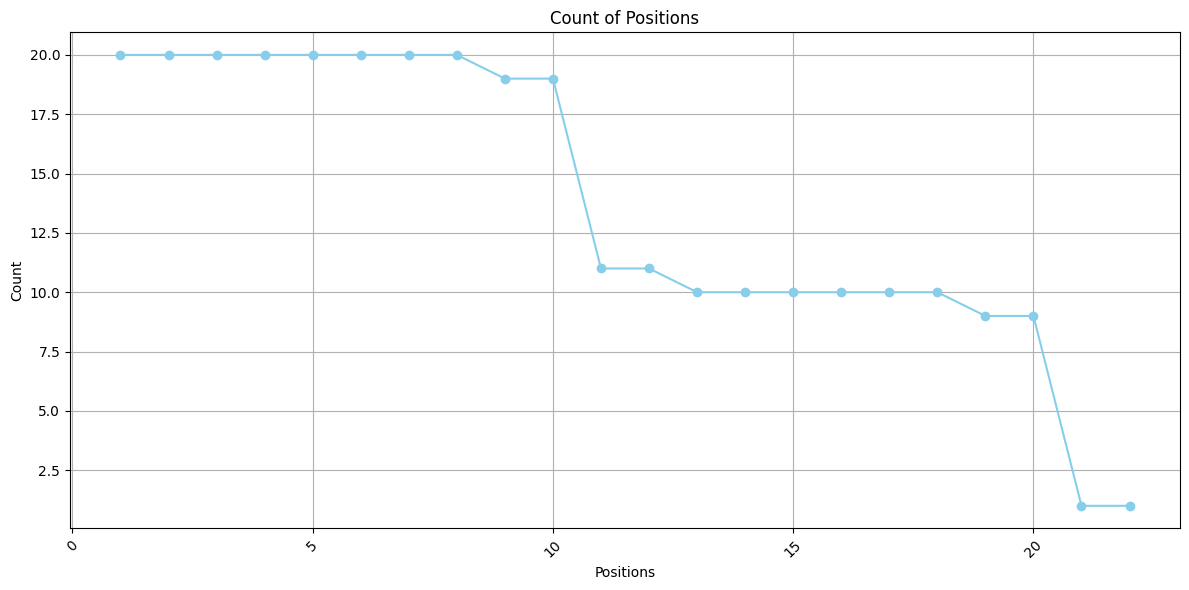

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(graph_df['Position'], graph_df['count'], marker='o', linestyle='-', color='skyblue')
plt.title('Count of Positions')
plt.xlabel('Positions')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()  # Optional: Add a grid for better readability
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

In [ ]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to fetch F1 race data for training
def fetch_race_data(season):
    url = f'https://api.jolpi.ca/ergast/f1/{season}/results.json'
    response = requests.get(url)
    data = response.json()

    races = []
    if 'Races' in data['MRData']['RaceTable']:
        for race in data['MRData']['RaceTable']['Races']:
            races.append({
                'season': int(race['season']),
                'round': int(race['round']),
                'winner': race['Results'][0]['Driver']['familyName'] if 'Results' in race and race['Results'] else None
            })

    return pd.DataFrame(races)  # Return DataFrame

# Load data
season = 2025  # Change as needed
race_data = fetch_race_data(season)

# Drop missing values
race_data.dropna(subset=['winner'], inplace=True)

# Encode winner names (convert text labels to numbers)
label_encoder = LabelEncoder()
race_data['winner_encoded'] = label_encoder.fit_transform(race_data['winner'])

# Prepare features (X) and target (y)
X = race_data[['season', 'round']].values
y = race_data['winner_encoded'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# ✅ Optimized Deep Learning Model with Fixes
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='sigmoid')
])

# ✅ Optimizer with Gradient Clipping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Callbacks for Stability
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
epochs = 100  # Can go beyond 50 safely now
batch_size = 42

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# ✅ Predict winner for a new race
new_race = np.array([[2025, 1]])
new_race = scaler.transform(new_race)
predicted_winner_idx = np.argmax(model.predict(new_race))
predicted_winner = label_encoder.inverse_transform([predicted_winner_idx])[0]

print(f"Predicted Winner for 2025: {predicted_winner}")

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.6905 - val_accuracy: 1.0000 - val_loss: 0.6571 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.6632 - val_accuracy: 1.0000 - val_loss: 0.6670 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.6922 - val_accuracy: 1.0000 - val_loss: 0.6781 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.6084 - val_accuracy: 1.0000 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.6047 - val_accuracy: 0.0000e+00 - val_loss: 0.7020 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.5431 - val_accuracy: 0.0000e+00 - val_loss: 0.7147 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.6040 - val_a

In [ ]:
#The model optimization and evaluation process showing iterative changes made to the model and the resulting changes in model performance is documented in either a CSV/Excel table or in the Python script itself (15 points)
#Overall model performance is printed or displayed at the end of the script (10 points)


In [ ]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to fetch F1 race data for training
def fetch_race_data(season):
    url = f'https://api.jolpi.ca/ergast/f1/{season}/results.json'
    response = requests.get(url)
    data = response.json()

    races = []
    if 'Races' in data['MRData']['RaceTable']:
        for race in data['MRData']['RaceTable']['Races']:
            races.append({
                'season': int(race['season']),
                'round': int(race['round']),
                'winner': race['Results'][0]['Driver']['familyName'] if 'Results' in race and race['Results'] else None
            })

    return pd.DataFrame(races)

# Load data
season = 2025
race_data = fetch_race_data(season)
race_data.dropna(subset=['winner'], inplace=True)

# Encode winner names
label_encoder = LabelEncoder()
race_data['winner_encoded'] = label_encoder.fit_transform(race_data['winner'])

# Features and target
X = race_data[['season', 'round']].values
y = race_data['winner_encoded'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Define configurations to try
model_configs = [
    {'layers': [64, 128, 64], 'dropout': 0.3, 'lr': 0.001, 'batch_size': 42},
    {'layers': [32, 64, 32], 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32},
    {'layers': [128, 64], 'dropout': 0.4, 'lr': 0.0005, 'batch_size': 64},
]

results = []

# Iterate over configurations
for i, config in enumerate(model_configs):
    print(f"\n🚀 Training model config {i+1}/{len(model_configs)}: {config}")

    # Build model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in config['layers']:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(config['dropout']))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  # multiclass classification

    # Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=config['lr'], clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

    # Train
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=config['batch_size'],
        callbacks=[early_stopping, reduce_lr],
        verbose=0  # hide training output for clarity
    )

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    results.append({
        'Model ID': i+1,
        'Layers': str(config['layers']),
        'Dropout': config['dropout'],
        'Learning Rate': config['lr'],
        'Batch Size': config['batch_size'],
        'Test Accuracy': acc,
        'Test Loss': loss
    })

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("model_optimization_log.csv", index=False)

# Display best model summary
best_model = max(results, key=lambda x: x['Test Accuracy'])

print("\n🏁 Final Best Model Summary:")
print(f"Model ID: {best_model['Model ID']}")
print(f"Architecture: {best_model['Layers']}")
print(f"Dropout Rate: {best_model['Dropout']}")
print(f"Learning Rate: {best_model['Learning Rate']}")
print(f"Batch Size: {best_model['Batch Size']}")
print(f"Test Accuracy: {best_model['Test Accuracy']:.4f}")
print(f"Test Loss: {best_model['Test Loss']:.4f}")

# Optional: Predict winner for a new race using the last model trained
new_race = np.array([[2025, 1]])
new_race = scaler.transform(new_race)
prediction = model.predict(new_race)
predicted_idx = np.argmax(prediction)
predicted_winner = label_encoder.inverse_transform([predicted_idx])[0]

print(f"\n🏆 Predicted Winner for 2025 Round 1: {predicted_winner}")



🚀 Training model config 1/3: {'layers': [64, 128, 64], 'dropout': 0.3, 'lr': 0.001, 'batch_size': 42}

🚀 Training model config 2/3: {'layers': [32, 64, 32], 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32}

🚀 Training model config 3/3: {'layers': [128, 64], 'dropout': 0.4, 'lr': 0.0005, 'batch_size': 64}

🏁 Final Best Model Summary:
Model ID: 1
Architecture: [64, 128, 64]
Dropout Rate: 0.3
Learning Rate: 0.001
Batch Size: 42
Test Accuracy: 1.0000
Test Loss: 0.6673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step

🏆 Predicted Winner for 2025 Round 1: Piastri
